<a href="https://colab.research.google.com/github/carnival77/Machine_Learning/blob/master/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Input Data

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

#(1)
m = 1000, a = 0.1, b = 0.4, σ = 0.03.

y=y^​+n -> y​=ax+b+n where n ~ N(0,0.03^2) 

1000개의 실수 [x,y] 데이터 생성
그 후 xi_arr, yi_arr 배열에 각각 저장.


In [0]:
num_points = 1000
vertors = []
for i in range(num_points):
  xi= np.random.normal(0.0,0.5) # random x value
  y_hat = xi*0.1 + 0.4 # y_hat = 0.1*xi + 0.4
  yi= y_hat + np.random.normal(0.0, 0.03) # y=y^​+n -> y^​=ax+b+n where n ~ N(0,0.03^2)
  vertors.append([xi,yi]) # 1000개의 [x,y] 데이터 생성.
xi_arr = [v[0] for v in vertors]
yi_arr = [v[1] for v in vertors]
  

#(2)
straight line of linear function y_hat = 0.1*xi + 0.4 
and data_set points

ERROR! Session/line number was not unique in database. History logging moved to new session 63


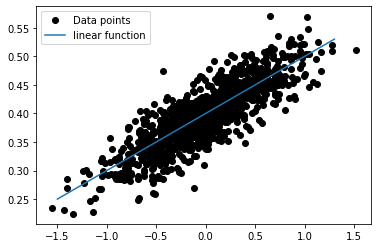

In [8]:
plt.plot(xi_arr,yi_arr,"ko",label = "Data points")
a_val = np.arange(-1.5,1.5,0.2)
y=[0.1*x +0.4 for x in a_val]
plt.plot(a_val,y,label="linear function")
plt.legend()
plt.show()